In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats
import pandas as pd

In [2]:
table = Table.read_table('airline_flights.csv')
table

/Users/umanair/anaconda3/lib/python3.11/site-packages/datascience/tables.py:163: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pandas.read_csv(filepath_or_buffer, *args, **vargs)


tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970,180,81.43,G4,1,81.43,G4,1,81.43,nan,nan,202131013514112ABEPIE
Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,nan,nan,202131013515304ABETPA
Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,nan,nan,202131014011259ABQDAL
Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,nan,nan,202131014011298ABQDFW
Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,nan,nan,202131014014107ABQPHX
Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,10721,ABQ,BOS,1974,153,324.97,AA,0.4263,323.73,WN,0.1609,298.2,nan,nan,202131014010721ABQBOS
Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,13296,ABQ,MHT,1974,16,315.9,WN,0.7285,270.42,WN,0.7285,270.42,nan,nan,202131014013296ABQMHT
Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,14307,ABQ,PVD,1974,22,329.22,WN,0.5415,271.6,WN,0.5415,271.6,nan,nan,202131014014307ABQPVD
Table1a,2021,3,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,159,255.89,WN,0.7212,244.89,WN,0.7212,244.89,nan,nan,202131014010821ABQBWI
Table1a,2021,3,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,151,291.16,AA,0.4404,296.88,WN,0.3197,247.2,nan,nan,202131014011278ABQDCA


In [19]:
#finding which flights have the most passengers

selected = table.select("Year", "quarter", "airport_1", "airport_2", "nsmiles", "passengers", "fare", "lf_ms")
new_tbl = selected.sort("passengers", descending = True)
new_tbl

Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,lf_ms
2019,2,LAX,JFK,2510,8301,407.22,0.1664
2019,4,LAX,JFK,2510,8103,420.95,0.1663
2018,2,LAX,JFK,2510,8023,398.74,0.1682
2019,3,LAX,JFK,2510,7857,401.88,0.1728
2018,4,LAX,JFK,2510,7718,420.37,0.1504
2017,4,LAX,JFK,2510,7661,414.65,0.1428
2015,2,LAX,JFK,2510,7555,417.38,0.16
2017,2,LAX,JFK,2510,7553,422.78,0.1617
2016,2,LAX,JFK,2510,7469,381.8,0.1925
2018,3,LAX,JFK,2510,7390,401.64,0.15


In [4]:
# finding frequencies of origin airpots

origin_airports_frequencies = new_tbl.group("airport_1").sort("count", descending = True)
origin_airports_frequencies.show(5)

airport_1,count
ORD,8819
MDW,8656
BOS,8046
DFW,8016
PVD,7697


In [5]:
destination_airports_frequencies = new_tbl.group("airport_2").sort("count", descending = True)
destination_airports_frequencies.show(5)

airport_2,count
DCA,10268
BWI,10222
IAD,10053
TPA,7673
SFO,7413


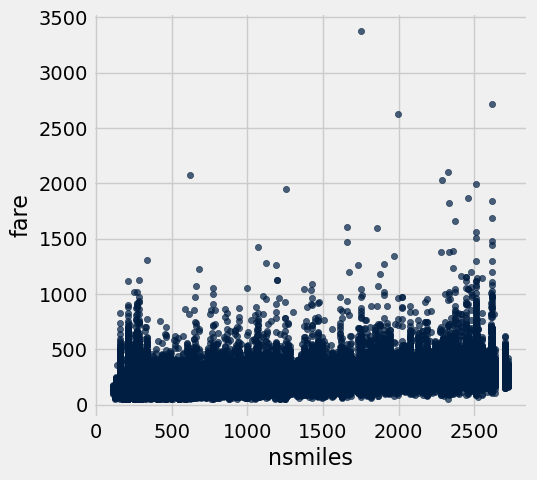

In [18]:
new_tbl.scatter("nsmiles" , "fare")

In [6]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
    

In [7]:
standard_units(new_tbl.column("nsmiles"))

array([ 1.87755475,  1.87755475,  1.87755475, ..., -0.25857125,
       -0.25857125, -0.62407351])

In [8]:
correlation(new_tbl, "nsmiles", "fare")

0.50040650129450537

In [9]:
slope(new_tbl, "nsmiles", "fare")

0.058622072296947852

In [10]:
intercept(new_tbl, "nsmiles", "fare")

149.23032299096286

In [11]:
residual(new_tbl, "nsmiles", "fare")

array([ 110.84827554,  124.57827554,  102.36827554, ...,    1.75862813,
         78.67862813,  404.74450071])

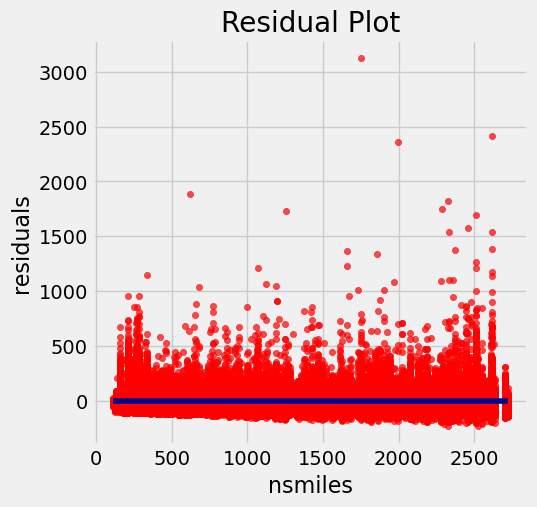

In [12]:
residual_plot(new_tbl, "nsmiles", "fare")

In [15]:
def boston_rmse(any_slope, any_intercept):
    x = new_tbl.column('passengers')
    y = new_tbl.column('fare')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5


In [16]:
boston_rmse(0.058622072296947852, 149.23032299096286)

71.317177525993671

In [17]:
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

In [20]:
slope(new_tbl, "passengers", "fare")

-0.02761810601227967

In [21]:
intercept(new_tbl, "passengers", "fare")

227.25056865403374

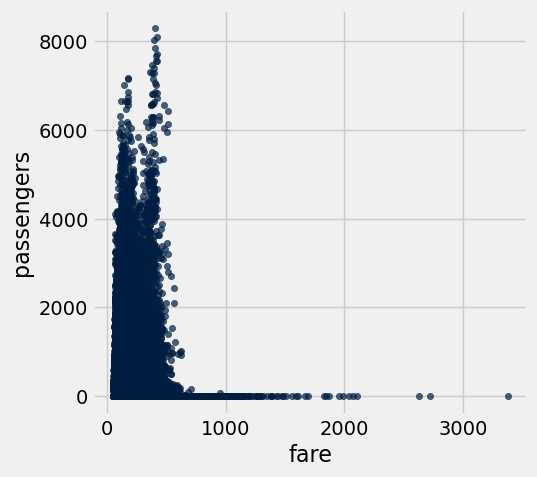

In [26]:
new_tbl.scatter("fare", "passengers")